In [38]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit import Parameter

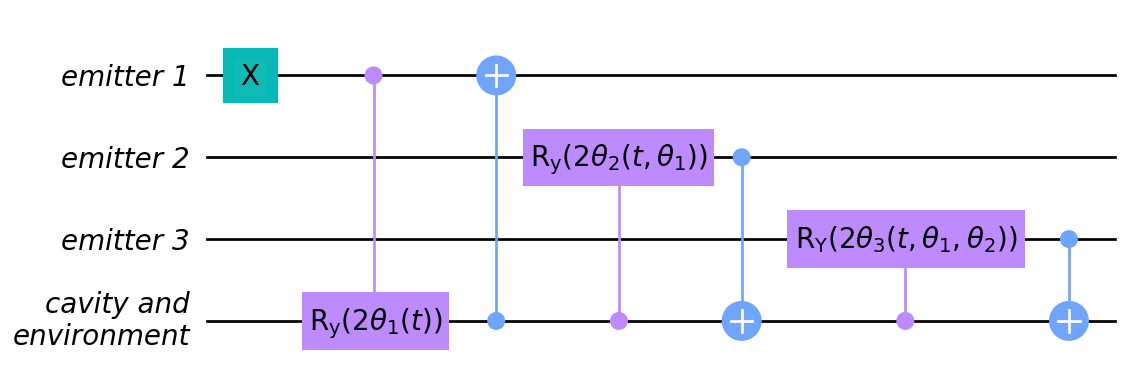

In [401]:
qr1 = QuantumRegister(1, 'emitter 1')
qr2 = QuantumRegister(1, 'emitter 2')
qr3 = QuantumRegister(1, 'emitter 3')
qr4 = QuantumRegister(1, '')  # placeholder; see below

circuit = QuantumCircuit(qr1, qr2, qr3, qr4)
circuit.x(0)

# theta_1 = Parameter(r'$2\theta_1(t)$')
theta_1 = Parameter(r'$2\theta_1(t)2\theta_1(t)$')
circuit.cry(theta_1, 0, 3)
circuit.cx(3, 0)

theta_2 = Parameter(r'2$\theta_2(t, \theta_1, \theta_5, \theta_g, 5)$')
circuit.cry(theta_2, 3, 1)
circuit.cx(1, 3)

theta_n = Parameter(r'2$\theta_2(t, \theta_t, \theta_4, \theta_5, \chi, 5)$')
circuit.cry(theta_n, 3, 2)
circuit.cx(2, 3)

# circuit.measure_all()

fig, ax = plt.subplots(figsize=(12, 3.9))
circuit.draw(output="mpl", ax=ax, scale=1)

# Qiskit has an issue creating qubit labels that contain linebreaks.
# The linebreak renders, but the label is wrapped in ${}$.
# As a workaround, we'll just manually insert the label for the
# qubit representing the "cavity and environment"
ax.text(
    0.2,
    -3.3,
    "cavity and\nenvironment",
    fontsize=20,
    color='black',
    fontstyle='italic',
    horizontalalignment='right',
    zorder=50,
    bbox=dict(facecolor='white', alpha=1, edgecolor='none'),
)

# Also add the other qubit labels, to make the font sizes match...
ax.text(
    0.2,
    -0.13,
    "emitter 1",
    fontsize=20,
    color='black',
    fontstyle='italic',
    horizontalalignment='right',
    zorder=50,
    bbox=dict(facecolor='white', alpha=1, edgecolor='none'),
)
ax.text(
    0.2,
    -1.13,
    "emitter 2",
    fontsize=20,
    color='black',
    fontstyle='italic',
    horizontalalignment='right',
    zorder=50,
    bbox=dict(facecolor='white', alpha=1, edgecolor='none'),
)
ax.text(
    0.2,
    -2.13,
    "emitter 3",
    fontsize=20,
    color='black',
    fontstyle='italic',
    horizontalalignment='right',
    zorder=50,
    bbox=dict(facecolor='white', alpha=1, edgecolor='none'),
)


# The gates are parametrized by some angles. Qiskit can put these angles on the gate labels,
# but they come out too small to see in the final figure, so let's use our own.
gate_purple = "#bd8bff"  # this is the standard purple color qiskit uses for Ry gates

ax.text(
    1.05,
    -0.12,
    "X",
    fontsize=20,
    color='black',
    horizontalalignment='right',
    zorder=50,
    bbox=dict(facecolor="#10bbb5", alpha=1, edgecolor='none'),
)

rect = patches.Rectangle((1.57, -3.35), width=1.79, height=0.7, facecolor=gate_purple, edgecolor='none', zorder=49, alpha=1)
ax.add_patch(rect)
ax.text(
    3.29,
    -3.11,
    r"$\text{R}_\text{y}(2\theta_1(t))$",
    fontsize=20,
    color='black',
    horizontalalignment='right',
    zorder=50,
    bbox=dict(facecolor=gate_purple, alpha=1, edgecolor='none'),
)

rect = patches.Rectangle((4.27, -1.35), width=2.33, height=0.7, facecolor=gate_purple, edgecolor='none', zorder=49, alpha=1)
ax.add_patch(rect)
ax.text(
    6.53,
    -1.11,
    r"$\text{R}_\text{y}(2\theta_2(t, \theta_1))$",
    fontsize=20,
    color='black',
    horizontalalignment='right',
    zorder=50,
    bbox=dict(facecolor=gate_purple, alpha=1, edgecolor='none'),
)

rect = patches.Rectangle((7.5, -2.35), width=2.9, height=0.7, facecolor=gate_purple, edgecolor='none', zorder=49, alpha=1)
ax.add_patch(rect)
ax.text(
    10.31,
    -2.11,
    r"$\text{R}_\text{Y}(2\theta_3(t, \theta_1, \theta_2))$",
    fontsize=20,
    color='black',
    horizontalalignment='right',
    zorder=50,
    bbox=dict(facecolor=gate_purple, alpha=1, edgecolor='none'),
)

plt.tight_layout()

# there is some excess white margin on the left side of the figure once exported
# let's trim that off
pos = ax.get_position()
new_pos = [pos.x0 - .01, pos.y0 + 0.03,  pos.width, pos.height]
ax.set_position(new_pos)

In [402]:
fig.savefig("../figures/QMARINA_circuit_diagram.eps")